In [21]:
import pandas as pd
import  psycopg2
from sqlalchemy import create_engine, inspect
import seaborn as sns

In [22]:
host = "czechitaspsql.postgres.database.azure.com"
port = 5432
user = "cimbalakova.hana.3"
username = f"{user}@czechitaspsql"
database = "postgres"
password = "gXeiz4f08NcpQj4n"
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

In [26]:
smrk = pd.read_sql("SELECT * FROM dreviny WHERE dd_txt = 'Smrk, jedle, douglaska'", con=engine)
smrk.sort_values(by="rok",inplace=True)
smrk.head()

,idhod,hodnota,stapro_kod,dd_cis,dd_kod,druhtez_cis,druhtez_kod,prictez_cis,prictez_kod,rok,uzemi_cis,uzemi_kod,dd_txt,druhtez_txt,prictez_txt,ELPRO_ID
11,701338149,10525158,5966,203.0,11.0,None,None,None,None,2000,97,19,"Smrk, jedle, douglaska",None,None,1845162
4,701338150,10444895,5966,203.0,11.0,None,None,None,None,2001,97,19,"Smrk, jedle, douglaska",None,None,1845162
5,701338151,10716741,5966,203.0,11.0,None,None,None,None,2002,97,19,"Smrk, jedle, douglaska",None,None,1845162
7,701338152,11942822,5966,203.0,11.0,None,None,None,None,2003,97,19,"Smrk, jedle, douglaska",None,None,1845162
9,701338153,12000075,5966,203.0,11.0,None,None,None,None,2004,97,19,"Smrk, jedle, douglaska",None,None,1845162


In [27]:
nahodila_tezba = pd.read_sql("SELECT * FROM dreviny WHERE druhtez_txt = 'Nahodilá těžba dřeva'", con=engine)
nahodila_tezba.sort_values(by="rok",inplace=True)
nahodila_tezba.head()

,idhod,hodnota,stapro_kod,dd_cis,dd_kod,druhtez_cis,druhtez_kod,prictez_cis,prictez_kod,rok,uzemi_cis,uzemi_kod,dd_txt,druhtez_txt,prictez_txt,ELPRO_ID
59,701338194,77886,5966,None,None,199.0,22.0,206.0,2.0,2000,97,19,None,Nahodilá těžba dřeva,Exhalační příčina,10009764
58,701338165,2387859,5966,None,None,199.0,22.0,206.0,1.0,2000,97,19,None,Nahodilá těžba dřeva,Živelní příčina,10009763
57,701338223,320203,5966,None,None,199.0,22.0,206.0,3.0,2000,97,19,None,Nahodilá těžba dřeva,Hmyzová příčina,10009761
56,701338252,502175,5966,None,None,199.0,22.0,206.0,9.0,2000,97,19,None,Nahodilá těžba dřeva,"Příčina jiná než živelní, exhalační a hmyzová",10009760
55,701338136,3288123,5966,None,None,199.0,22.0,NaN,NaN,2000,97,19,None,Nahodilá těžba dřeva,None,1845105


<AxesSubplot:xlabel='rok', ylabel='hodnota'>

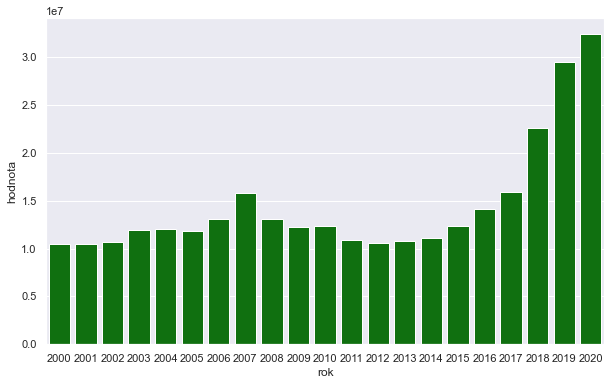

In [40]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="rok", y="hodnota", data=smrk, color="green")

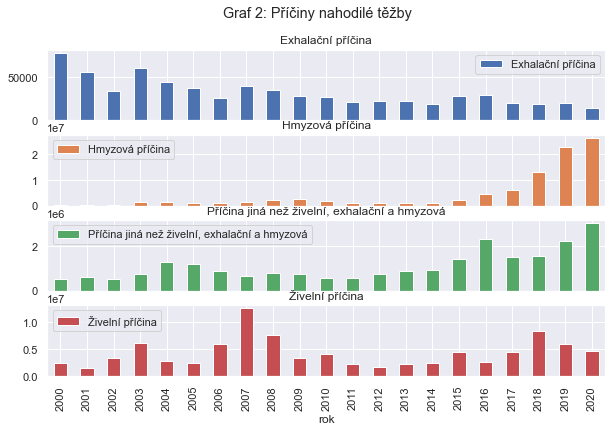

In [38]:
pivot_nahodila = pd.pivot_table(nahodila_tezba, index=("rok"), columns=("prictez_txt"), values="hodnota", aggfunc="sum").plot(kind='bar', subplots=True, title="Graf 2: Příčiny nahodilé těžby")

Prudký nárůst těžby jehličnanů je způsobený kůrovcovou kalamitou (Viz Graf 2 - hmyzová příčina)
Zvýšená těžba v roce 2007 je způsobená odstraňováním živelné pohromy (viz Graf 2 - živelní příčina), konkrétně se jednalo o bouři Kyrill v lednu 2007)